In [1]:
%run /eos/project/l/liu/Toolbox/myToolbox.py

%config InlineBackend.figure_format = 'retina'

sys.path.append('/eos/user/n/nkarast/SWAN/PyNAFF/')
from PyNAFF import naff

Version 0.03. This is the latest version.
Please help me to improve it reporting bugs to guido.sterbini@cern.ch.


/cvmfs/sft.cern.ch/lcg/views/LCG_91/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Your platform is Linux-3.10.0-693.11.6.el7.centos.plus.x86_64-x86_64-with-redhat-6.9-Carbon
Your folder is /eos/user/a/ahuschau/Simulations/PS/optics_repository/iOMC/psmod/2018/output/anharmonicities
Your IP is 172.17.0.5
2018-05-09 08:47:52


In [2]:
files = sorted(glob.glob('ptc_track.obs0001.p00*'))
files

['ptc_track.obs0001.p0001',
 'ptc_track.obs0001.p0002',
 'ptc_track.obs0001.p0003',
 'ptc_track.obs0001.p0004',
 'ptc_track.obs0001.p0005',
 'ptc_track.obs0001.p0006',
 'ptc_track.obs0001.p0007',
 'ptc_track.obs0001.p0008',
 'ptc_track.obs0001.p0009',
 'ptc_track.obs0001.p0010',
 'ptc_track.obs0001.p0011',
 'ptc_track.obs0001.p0012',
 'ptc_track.obs0001.p0013',
 'ptc_track.obs0001.p0014',
 'ptc_track.obs0001.p0015']

In [3]:
# function definitions to perform linear fit

def lin_model(x, a, b):
    return a*x+b

def makeLinearFit_2_parameters(X,Y):
    a0 = 1e-3
    b0 = 0.5
    popt,pcov = curve_fit(lin_model,X,Y,p0=[a0, b0])
    return popt,pcov

In [4]:
optics_file = '../twiss/PS_LE_bare_machine.twiss'

optic = metaclass.twiss(optics_file)

In [12]:
J = []
Q = []

alpha = optic.ALFX[0]
beta = optic.BETX[0]
gamma = (1 + alpha**2)/beta
    
for file_ in files: 
    print(file_)
    amplitude = metaclass.twiss(file_)

    J.append(amplitude.X[0]**2 * gamma * 1e6)
    Q.append(naff(amplitude.X[0:1000])[0][1])

ptc_track.obs0001.p0001
ptc_track.obs0001.p0002
ptc_track.obs0001.p0003
ptc_track.obs0001.p0004
ptc_track.obs0001.p0005
ptc_track.obs0001.p0006
ptc_track.obs0001.p0007
ptc_track.obs0001.p0008
ptc_track.obs0001.p0009
ptc_track.obs0001.p0010
ptc_track.obs0001.p0011
ptc_track.obs0001.p0012
ptc_track.obs0001.p0013
ptc_track.obs0001.p0014
ptc_track.obs0001.p0015


# Horizontal phase space (all other coordinates at zero)

ptc_track.obs0001.p0001
ptc_track.obs0001.p0002
ptc_track.obs0001.p0003
ptc_track.obs0001.p0004
ptc_track.obs0001.p0005
ptc_track.obs0001.p0006
ptc_track.obs0001.p0007
ptc_track.obs0001.p0008
ptc_track.obs0001.p0009
ptc_track.obs0001.p0010
ptc_track.obs0001.p0011
ptc_track.obs0001.p0012
ptc_track.obs0001.p0013
ptc_track.obs0001.p0014
ptc_track.obs0001.p0015


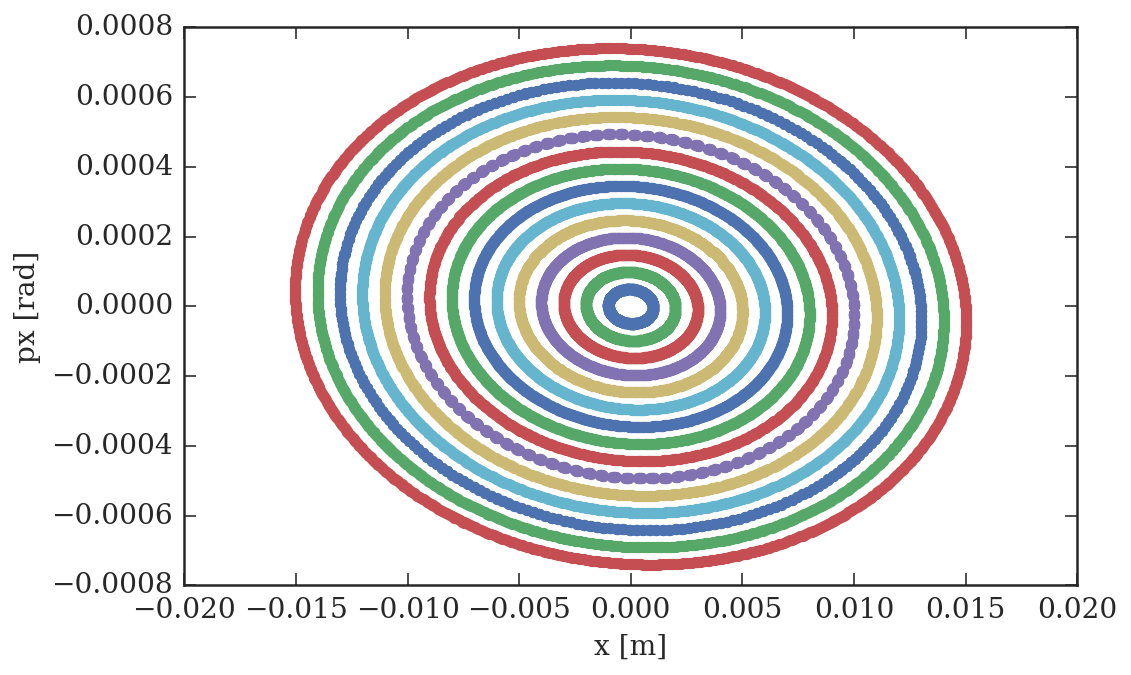

In [13]:
f, ax = plt.subplots(1, figsize = (8,5))

for file_ in files: 
    print(file_)
    amplitude = metaclass.twiss(file_)
    
    ax.plot(amplitude.X, amplitude.PX, 'o')

ax.set_xlabel('x [m]')
ax.set_ylabel('px [rad]')

# Resulting anharmonicities from PTC

In [ ]:
 "Q1"                         0          0          0          0       0.2453999062
 "Q2"                         0          0          0          0       0.2836999065
 "ANHX"                       1          0          0          0        10.44932545
 "ANHX"                       2          0          0          0        160.7105052
 "ANHX"                       3          0          0          0                 -0
 "ANHX"                       0          1          0          0        40.85416104
 "ANHY"                       1          0          0          0        40.85416104
 "ANHY"                       2          0          0          0       -10555.15454
 "ANHY"                       3          0          0          0                 -0
 "ANHY"                       0          1          0          0       -53.23696076

# Linear fit including large amplitude particles

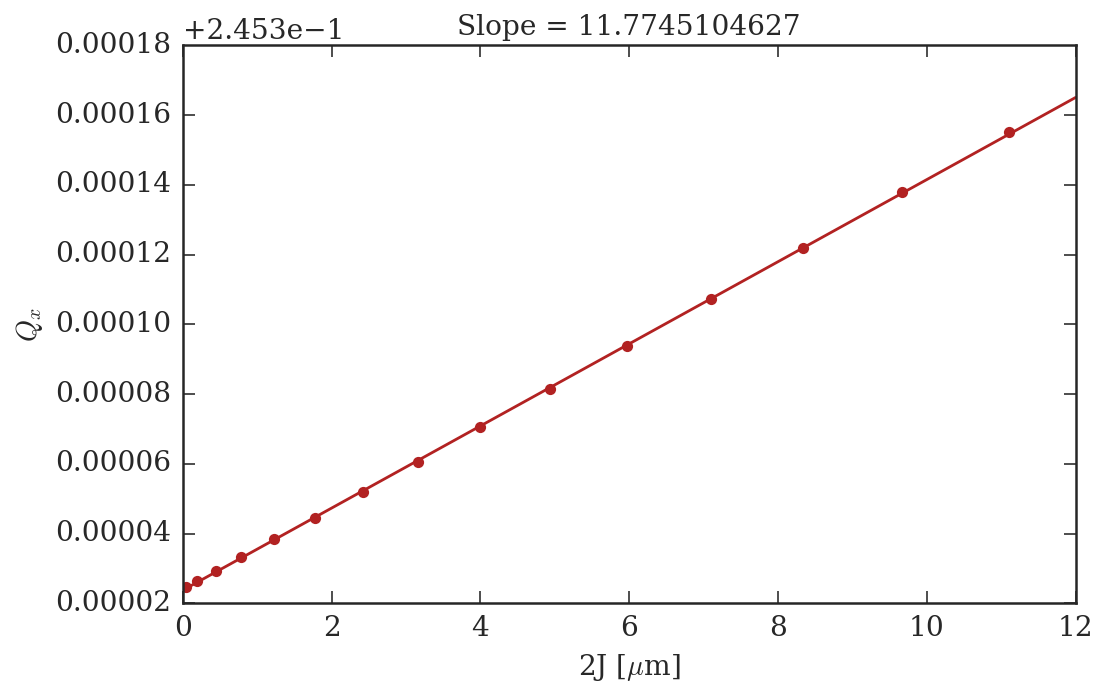

In [14]:
f, ax = plt.subplots(1, figsize = (8,5))

ax.plot(J, Q, 'o', color = 'firebrick')

out = makeLinearFit_2_parameters(J, Q)
pos = np.linspace(0, 12, 2)

ax.plot(pos, lin_model(pos, out[0][0], out[0][1]),  color = 'firebrick')

ax.set_xlabel('2J [$\mu $m]')
ax.set_ylabel('$Q_x$')
ax.set_title('Slope = ' + str(out[0][0]*1e6))

# Linear fit of only small amplitude particles (indicated in black)

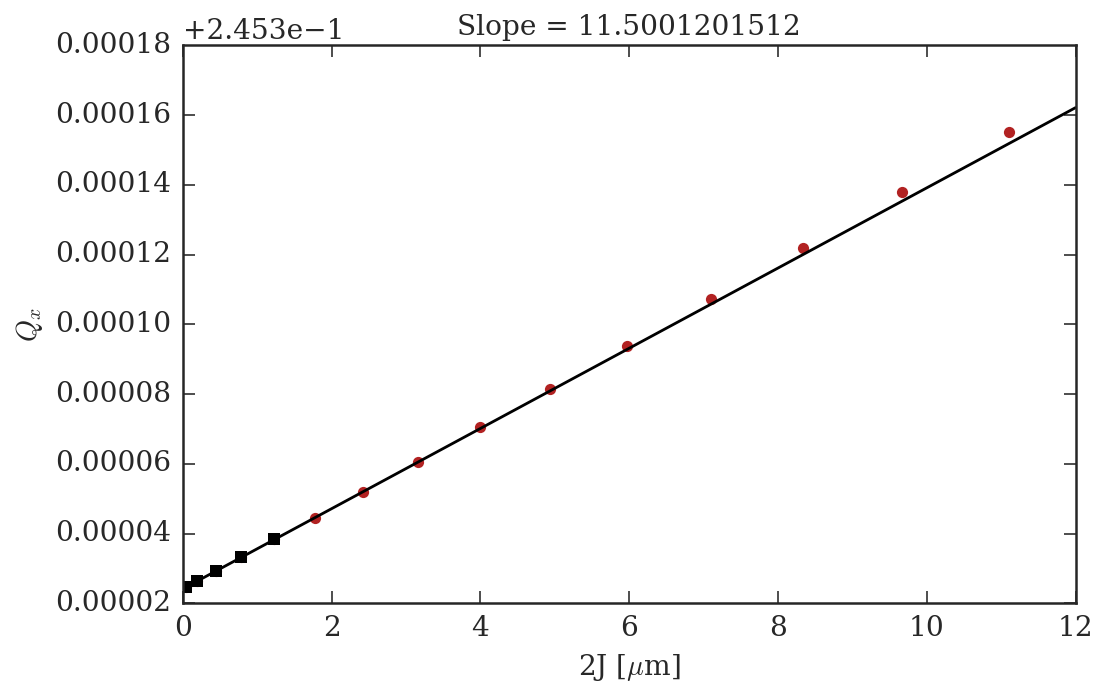

In [15]:
f, ax = plt.subplots(1, figsize = (8,5))

ax.plot(J, Q, 'o', color = 'firebrick' )
ax.plot(J[0:5], Q[0:5], 'ks')

out = makeLinearFit_2_parameters(J[0:5], Q[0:5])
pos = np.linspace(0, 12, 2)

ax.plot(pos, lin_model(pos, out[0][0], out[0][1]), 'k')

ax.set_xlabel('2J [$\mu $m]')
ax.set_ylabel('$Q_x$')
ax.set_title('Slope = ' + str(out[0][0]*1e6))